# Predict the price of a car

### estimate Price(mileage) = θ0 + (θ1 ∗ mileage)

In [ ]:
#read csv
import pandas as pd
pd.read_csv("data.csv")

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250
5,114800,5350
6,166800,5800
7,89000,5990
8,144500,5999
9,84000,6200


In [4]:
#running prediction formula with random coefficients
mileage = int(input('Enter mileage'))
t0 = 1
t1 = 2
price = t0 + mileage * t1
print(price)
input('enter mileage')


KeyboardInterrupt: 

Enter mileage10


In [3]:
#running linear regression to identify coefficients
data = pd.read_csv("data.csv")
x = data.km
y = data.price
x_bar = sum(x)/len(x)
y_bar = sum(y)/len(y)
t1 = sum((x - x_bar) * (y-y_bar))/sum((x-x_bar)**2)
t0 = y_bar - x_bar * t1
print(t0,t1)



8499.599649933216 -0.0214489635917023


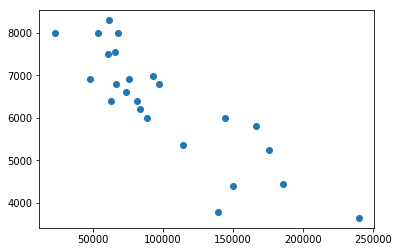

In [4]:
#data visualization
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(data.km,data.price)
plt.show()

In [18]:
#normalizing data set
def normalize(data):
    dataNew = data
    for column in data:
        mean = sum(data[column])/len(data[column])
        sd = data[column]-mean
        sd = (sum(sd*sd)/(len(sd)-1))**(0.5)
        dataNew[column] = (data[column]-mean)/sd
        return(dataNew)
normalize(data)

,km,price
0,2.637603,-2.032224
1,0.735345,-1.918558
2,0.938480,-1.463894
3,1.603511,-1.426005
4,1.422588,-0.819785
5,0.260730,-0.744008
6,1.247930,-0.403010
7,-0.229073,-0.259033
8,0.824573,-0.252213
9,-0.323996,-0.099900


In [28]:
#running linear regression to identify coefficients on normalized data
x = dataNew.km
y = dataNew.price
x_bar = sum(x)/len(x)
y_bar = sum(y)/len(y)
t1 = sum((x - x_bar) * (y-y_bar))/sum((x-x_bar)**2)
t0 = y_bar - x_bar * t1
print(t0,t1)

t0_lin, t1_lin = t0, t1


3.2368507773242213e-16 -0.8561394207905022


In [38]:
#linear regression using mean square error for Normalized data

def predicted_price(data, t0,t1):
    return(t0 + (t1 * data.km))
def rmse(t0,t1):
    sum_error = 0.0 
    estimated_price = predicted_price(dataNew,t0,t1)
    for i in range(0,len(dataNew.km)):
        prediction_error = dataNew.price[i] - estimated_price[i]
        sum_error = sum_error + (prediction_error ** 2)
    mean_error = sum_error / float(len(dataNew.price))
    return(mean_error)

rmse(t0_lin, t1_lin)



0.25589923832814915

In [1]:
#gradient descent
t0,t1 = -3,3
lr = 0.01
m = len(dataNew.km)
tmp1 = 10
i= 0
loss_old =0
loss_new = 1
precision= 0.00000001
max_iters = 10000
step = 1
save_counter = 0


while step > precision and i < max_iters :
    tmp0 = lr/m*sum(predicted_price(dataNew,t0,t1)-dataNew.price)
    tmp1 = lr/m*sum((predicted_price(dataNew,t0,t1)-dataNew.price)*dataNew.km)
    loss_old = rmse(t0,t1)
    loss_new = rmse(t0-tmp0,t1-tmp1)
    step = (tmp0**2+tmp1**2+(loss_old - loss_new)**2)**0.5
    t0 = t0 - tmp0
    t1 = t1 - tmp1
    i += 1

print(t0,t1,step,i)


NameError: name 'dataNew' is not defined

In [39]:
lr/m*sum(predicted_price(dataNew,t0,t1)-dataNew.price)

-0.030000000000000002